In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
exp = [-12.64, -11.85, -4.68, -23.62, -25.47]
mm = [-17.02, -15.27, -9.55, -20.10, -20.72]
ml_mm_me = [-16.65, -15.73, -10.24, -28.87, -28.18]
ml_mm_ee1 = [-14.40, -13.42, -10.09, -27.02, -28.12]
ml_me_ee2 = [-14.44, -13.46, -11.22, -26.08, -27.82]
ml_me_ee3 = [-14.43, -13.48, -10.97, -26.41, -27.72]

# avg
ml_mm_ee = np.mean([ml_mm_ee1, ml_me_ee2, ml_me_ee3], axis=0)

In [3]:
ml_mm_ee

array([-14.42333333, -13.45333333, -10.76      , -26.50333333,
       -27.88666667])

In [4]:
data_dict = {
    'OpenFF/TIP3P': mm,
    'Exp.': exp,
    'Mechanical Embedding ML/MM': ml_mm_me,
    'Patched Model (This Work)': ml_mm_ee,
}

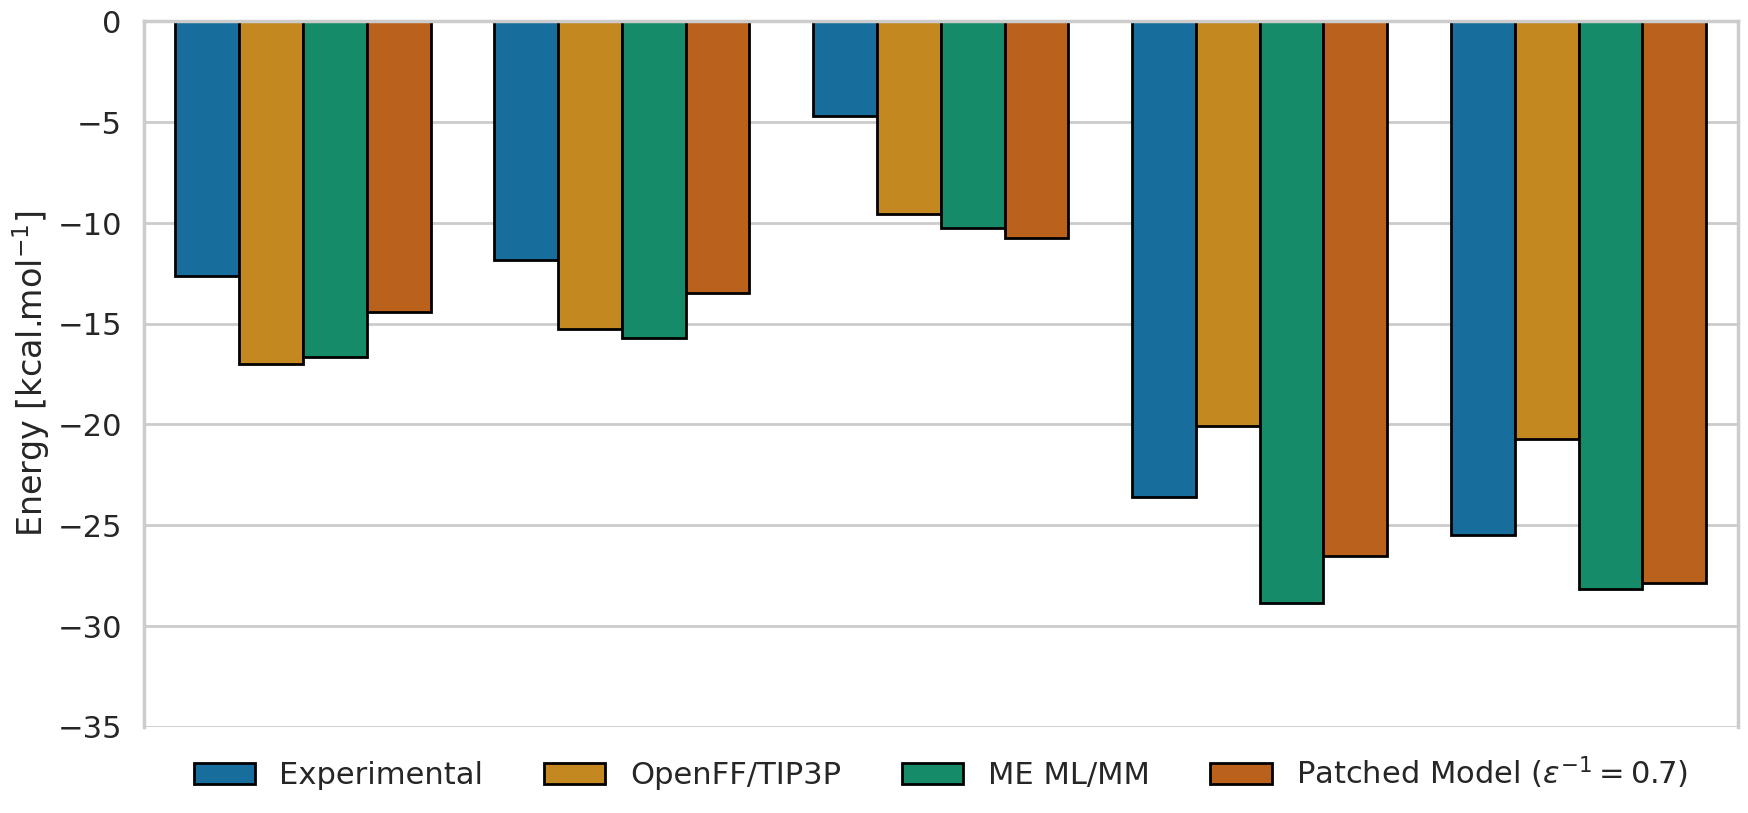

In [5]:
sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
data_dict = {
    "Model": [],
    "Molecule": [],
    "Energy": [],
}

# Convert dictionary to long format
for model, values in {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    'ME ML/MM': ml_mm_me,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
}.items():
    for mol, energy in zip(molecules, values):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Energy"].append(energy)

df = pd.DataFrame(data_dict)

# Plot
ax = sns.barplot(data=df, x="Molecule", y="Energy", hue="Model", edgecolor="black")

# Customize
ax.set_xticks([])
plt.ylabel(r"Energy [kcal.mol$^{-1}$]")
plt.xlabel("")
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, -0.00), ncol=4)
ax.spines["bottom"].set_visible(False)

ax.set_ylim(-35,0)

# Show
plt.savefig("hfe_transferable.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


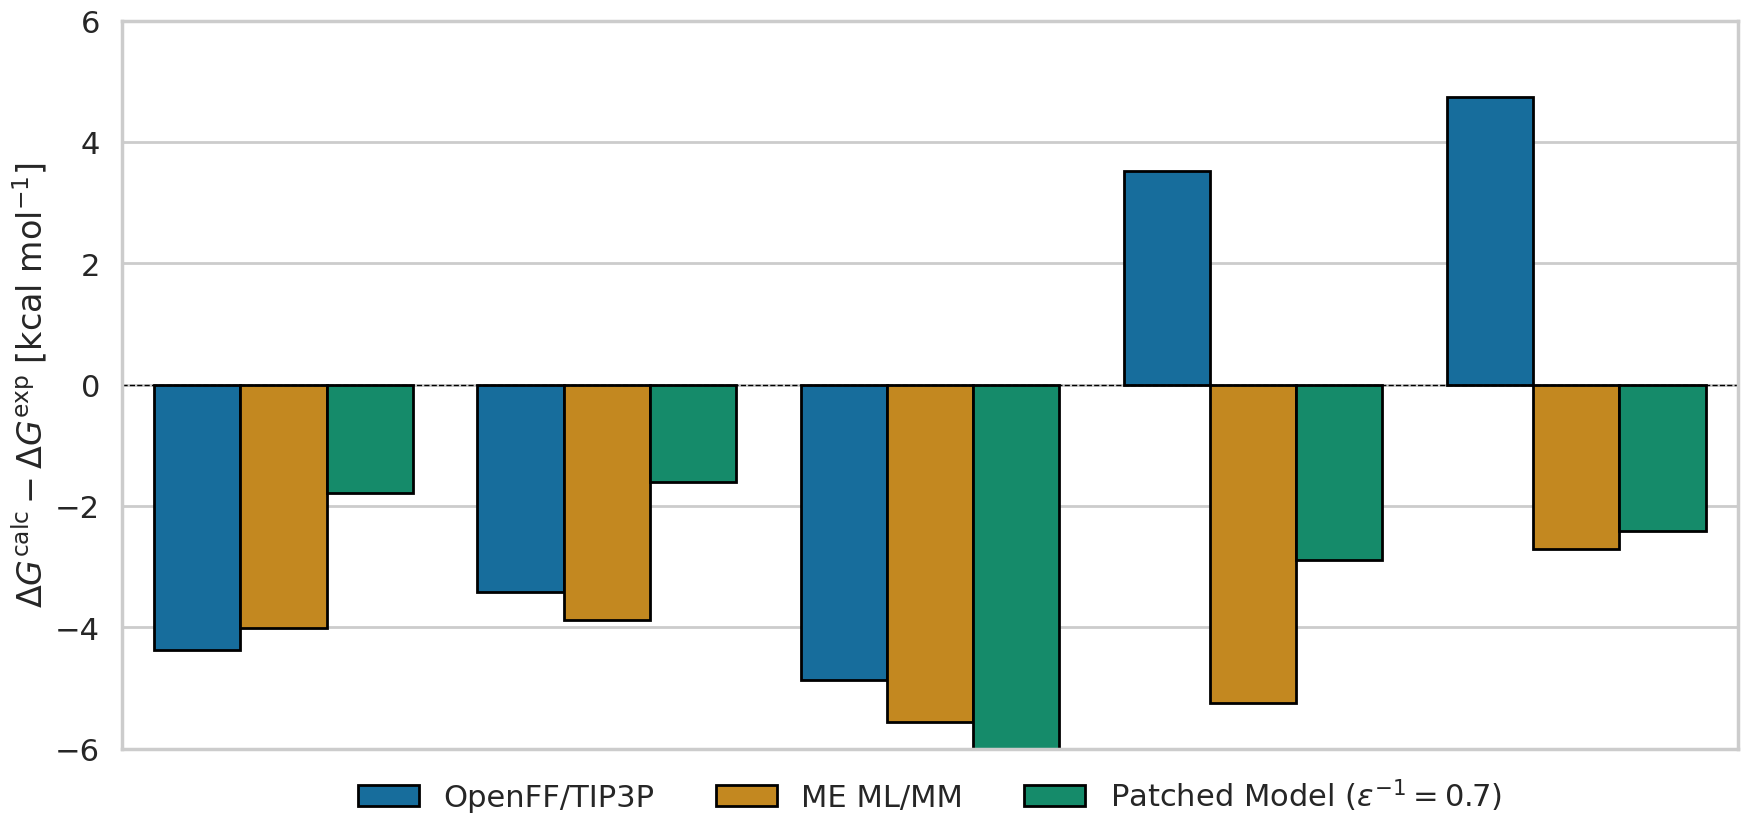

In [6]:
sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
models = {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    'ME ML/MM': ml_mm_me,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
}

# Compute errors w.r.t. experimental data
data_dict = {"Model": [], "Molecule": [], "Error": []}
exp_values = np.array(models["Experimental"])  # Convert experimental values to NumPy array

for model, values in models.items():
    if model == "Experimental":  # Skip experimental itself
        continue
    errors = np.array(values) - exp_values  # Compute error
    for mol, error in zip(molecules, errors):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Error"].append(error)

df = pd.DataFrame(data_dict)

# Plot error bars
ax = sns.barplot(data=df, x="Molecule", y="Error", hue="Model", edgecolor="black")

# Customize
ax.set_xticks([])
plt.ylabel(r"$\Delta G^{\mathrm{calc}} - \Delta G^{\mathrm{exp}}$ [kcal mol$^{-1}$]")
plt.xlabel("")
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Add reference line at zero
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)
# ax.spines["bottom"].set_visible(False)

# Adjust y-limits based on the errors range
ax.set_ylim(-6, 6)

# Show
plt.savefig("hfe_errors.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


/tmp/ipykernel_1209006/3901777345.py:43: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  ax = sns.barplot(
/tmp/ipykernel_1209006/3901777345.py:43: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


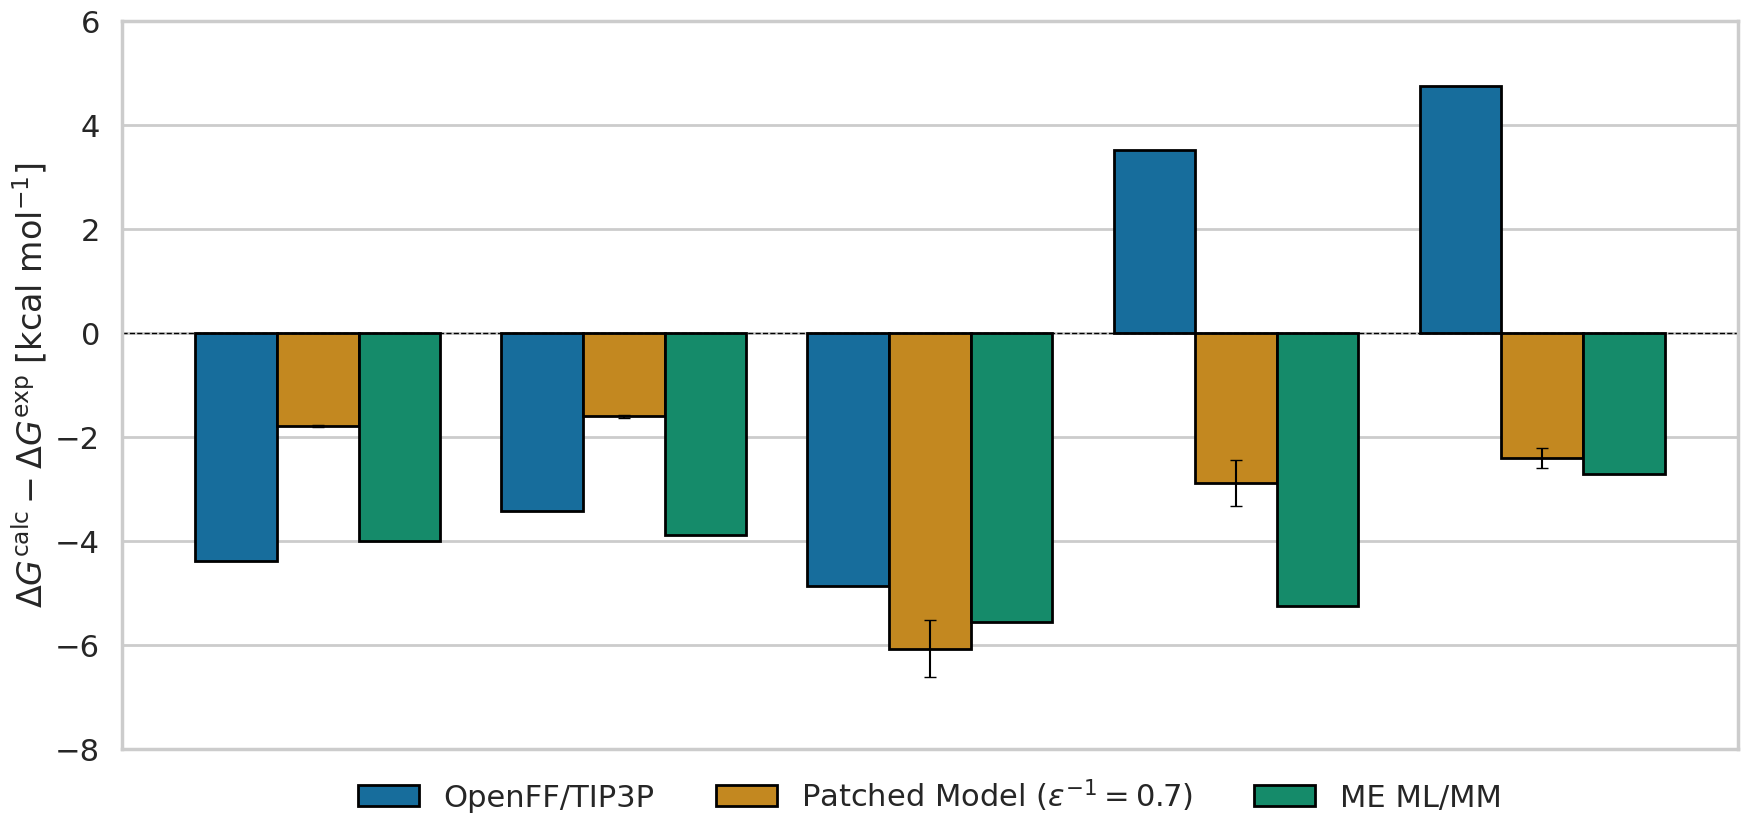

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
models = {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
    'ME ML/MM': ml_mm_me,
}

# Compute std and CI for the ensemble model (ml_mm_ee)
ml_mm_ee_std = np.std([ml_mm_ee1, ml_me_ee2, ml_me_ee3], axis=0)  # Standard deviation
ml_mm_ee_CI = (ml_mm_ee_std / np.sqrt(3)) * 1.96  # 95% CI

# Compute errors w.r.t. experimental data
data_dict = {"Model": [], "Molecule": [], "Error": [], "Error_CI": []}
exp_values = np.array(models["Experimental"])  # Convert experimental values to NumPy array

for model, values in models.items():
    if model == "Experimental":  # Skip experimental itself
        continue
    errors = np.array(values) - exp_values  # Compute error

    # Assign CI only for 'ml_mm_ee', others will have None
    ci_values = ml_mm_ee_CI if model == r'Patched Model ($\epsilon^{-1}=0.7$)' else np.zeros_like(errors)

    for mol, error, ci in zip(molecules, errors, ci_values):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Error"].append(error)
        data_dict["Error_CI"].append(ci)

df = pd.DataFrame(data_dict)

# Plot with error bars
ax = sns.barplot(
    data=df, x="Molecule", y="Error", hue="Model", edgecolor="black",
    capsize=0.2, errcolor="black", errwidth=1.5
)

# Manually add error bars using the computed CIs
for i, (model, molecule) in enumerate(zip(df["Model"], df["Molecule"])):
    ci = df.loc[i, "Error_CI"]
    if ci > 0:  # Only plot error bars where CIs exist
        ax.errorbar(
            x=i % len(molecules),  # Position within each molecule group
            y=df.loc[i, "Error"],
            yerr=ci,
            fmt="none",
            ecolor="black",
            elinewidth=1.5,
            capsize=4,
        )

# Customize
ax.set_xticks([])
plt.ylabel(r"$\Delta G^{\mathrm{calc}} - \Delta G^{\mathrm{exp}}$ [kcal mol$^{-1}$]")
plt.xlabel("")
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Add reference line at zero
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust y-limits based on the errors range
ax.set_ylim(-8, 6)

# Show
plt.savefig("hfe_errors.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


In [8]:
import numpy as np

# Experimental values
exp_values = np.array(models["Experimental"])

# Compute RMSE for each model
rmse_dict = {}
for model, values in models.items():
    if model == "Experimental":
        continue  # Skip experimental itself
    errors = np.array(values) - exp_values  # Compute error
    rmse = np.sqrt(np.mean(errors**2))  # Compute RMSE
    rmse_dict[model] = rmse

# Print RMSEs
for model, rmse in rmse_dict.items():
    print(f"RMSE for {model}: {rmse:.3f} kcal/mol")


RMSE for OpenFF/TIP3P: 4.232 kcal/mol
RMSE for Patched Model ($\epsilon^{-1}=0.7$): 3.373 kcal/mol
RMSE for ME ML/MM: 4.404 kcal/mol
